In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv(os.getcwd() + '\data\merged_train.csv')
# data.head()

## Regression

Regression model to predict the votes cast for Republican and Democratic parties in each county

**Choosing variables**

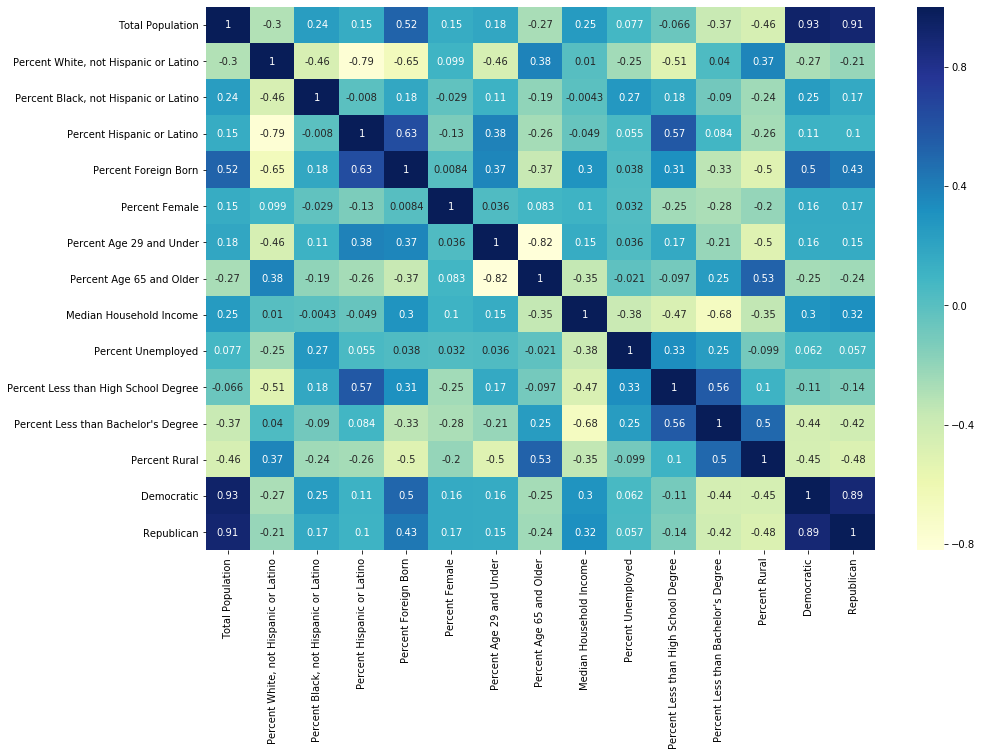

In [3]:
correlation = data.iloc[:, np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype=np.intp)].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation,cmap="YlGnBu",annot=True, ax=ax)
plt.show()

In [4]:
# columns = np.array([3, 4, 5, 7, 10, 11, 14, 15], dtype=np.intp)
# columns = np.array([i for i in range(3, 16)], dtype=np.intp)
reg_columns = np.array([3, 7, 11, 14, 15], dtype=np.intp)

k = len(reg_columns)

**Method for model evaluation**

In [5]:
def eval_regression_model(y_test, y_pred):
    eval = ''
    eval += 'Root Mean Square Error: {}'.format(metrics.mean_squared_error(y_test, y_pred) ** 0.5) + '\n'
    eval += 'Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)) + '\n'
    n = len(y_test)
    r2 = metrics.r2_score(y_test, y_pred)
    adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    eval += 'R-Squared: {}'.format(r2) + '\n'
    eval += 'Adjusted R-Squared: {}'.format(adjusted_r2)
    return eval

**Method for building and training a regression model**

In [6]:
def train_regression_model(x, y):
    model = Pipeline([
        ('scalar', StandardScaler()),
        ('clf', linear_model.LassoCV(cv = 3))
#         ('clf', linear_model.LinearRegression())
    ])
    model.fit(x, y)
    return model

**Predicting the votes cast for the democratic party**

In [7]:
# Splitting using hold-out method
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, reg_columns], data['Democratic'], train_size=0.75, random_state=5)

dem_model = train_regression_model(x_train, y_train)
y_pred = dem_model.predict(x_test)
print(eval_regression_model(y_test, y_pred))

Root Mean Square Error: 25217.40591055732
Mean Absolute Error: 7234.57212589522
R-Squared: 0.9089917284310998
Adjusted R-Squared: 0.9074386862541561


**Predicting the votes cast for the Republican party**

In [8]:
# Splitting using hold-out method
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, reg_columns], data['Republican'], train_size=0.75, random_state=5)

rep_model = train_regression_model(x_train, y_train)
y_pred = rep_model.predict(x_test)
print(eval_regression_model(y_test, y_pred))

Root Mean Square Error: 17429.572586937353
Mean Absolute Error: 8085.641246178764
R-Squared: 0.880328639790789
Adjusted R-Squared: 0.8782864664083793


## Classification

Classification models to classify each county as either republican or democratic

**Choosing variables**

Plot correlation heatmap and choose the variables that have a strong negative or positive correlation with the target variable

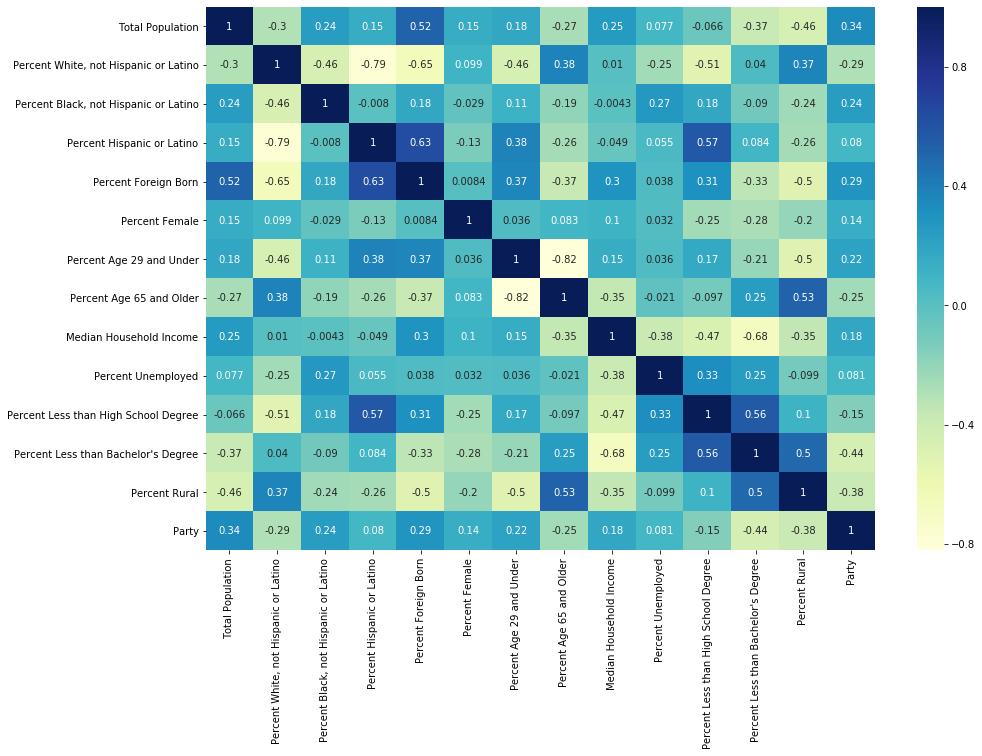

In [9]:
correlation = data.iloc[:, np.array([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18], dtype=np.intp)].corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation,cmap="YlGnBu",annot=True, ax=ax)
plt.show()

In [10]:
# columns = np.array([i for i in range(4, 16)], dtype=np.intp) # All columns
class_columns = np.array([3, 4, 5, 7, 10, 14, 15], dtype=np.intp)
# columns = np.array([3, 4, 5, 7, 10, 14, 15], dtype=np.intp)
# columns = np.array([3, 4, 5, 6, 7, 11, 14, 15], dtype=np.intp)

# Splitting the dataset using hold-out method
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, class_columns], data['Party'], train_size=0.75, random_state=0)

**Method for evaluating a classifier**

In [11]:
def eval_classifier(y_test, y_pred):
    return_str = ''
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return_str += 'Accuracy: {}'.format( accuracy ) + '\n'
    return_str += 'Error: {}'.format( 1 - accuracy ) + '\n'
    return_str += 'Precision: {}'.format( metrics.precision_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'Recall: {}'.format( metrics.recall_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'F1 Score: {}'.format( metrics.f1_score(y_test, y_pred, average = None) )
    return return_str

**Method for building and training a classifier**

In [12]:
def train_classifier(clf, x_train, y_train):
    classifier = Pipeline([('scalar', StandardScaler()),
        ('clf', clf)
    ])
    classifier.fit(x_train, y_train)
    return classifier

**Using Decision Tree for classification**

Accuracy: 0.7290969899665551
Error: 0.27090301003344486
Precision: [0.83098592 0.47674419]
Recall: [0.7972973  0.53246753]
F1 Score: [0.8137931  0.50306748]


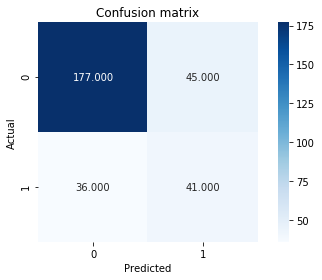

In [13]:
# We are using 'entropy' as the splitting criterion and increasing the class weight of the class '1'
# because the data is skewed

dt_classifier = train_classifier(DecisionTreeClassifier(criterion = "entropy"), x_train, y_train)

y_pred = dt_classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(eval_classifier(y_test, y_pred))

**Using SVM for classification**

Accuracy: 0.8294314381270903
Error: 0.1705685618729097
Precision: [0.83529412 0.79545455]
Recall: [0.95945946 0.45454545]
F1 Score: [0.89308176 0.5785124 ]


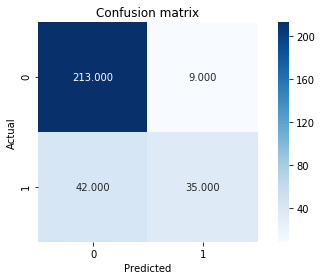

In [14]:
# We are using 'rbf' kernel
svm_classifier = train_classifier(SVC(kernel='rbf'), x_train, y_train)

y_pred = svm_classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(eval_classifier(y_test, y_pred))

**Using Naive Bayes Classifier**

Accuracy: 0.8060200668896321
Error: 0.19397993311036787
Precision: [0.85042735 0.64615385]
Recall: [0.8963964  0.54545455]
F1 Score: [0.87280702 0.5915493 ]


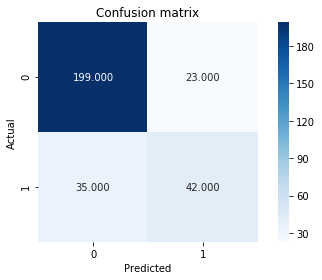

In [15]:
nb_classifier = train_classifier(GaussianNB(), x_train, y_train)
y_pred = nb_classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(eval_classifier(y_test, y_pred))

## Testing the regression and classification models

The best performing regression and classification modes are tested below

In [16]:
test_data = pd.read_csv(os.getcwd() + '\data\demographics_test.csv')
# test_data.head()

In [17]:
test_data['Democratic'] = dem_model.predict(test_data.iloc[:, reg_columns])

In [18]:
test_data['Republican'] = rep_model.predict(test_data.iloc[:, reg_columns])

In [21]:
test_data[test_data['Democratic'] < 0].count()

State                                    46
County                                   46
FIPS                                     46
Total Population                         46
Percent White, not Hispanic or Latino    46
Percent Black, not Hispanic or Latino    46
Percent Hispanic or Latino               46
Percent Foreign Born                     46
Percent Female                           46
Percent Age 29 and Under                 46
Percent Age 65 and Older                 46
Median Household Income                  46
Percent Unemployed                       46
Percent Less than High School Degree     46
Percent Less than Bachelor's Degree      46
Percent Rural                            46
Democratic                               46
Republican                               46
Party                                    46
dtype: int64

In [20]:
columns = np.array([3, 4, 5, 7, 9, 10, 13, 14, 15], dtype=np.intp)
test_data['Party'] = nb_classifier.predict(test_data.iloc[:, class_columns])